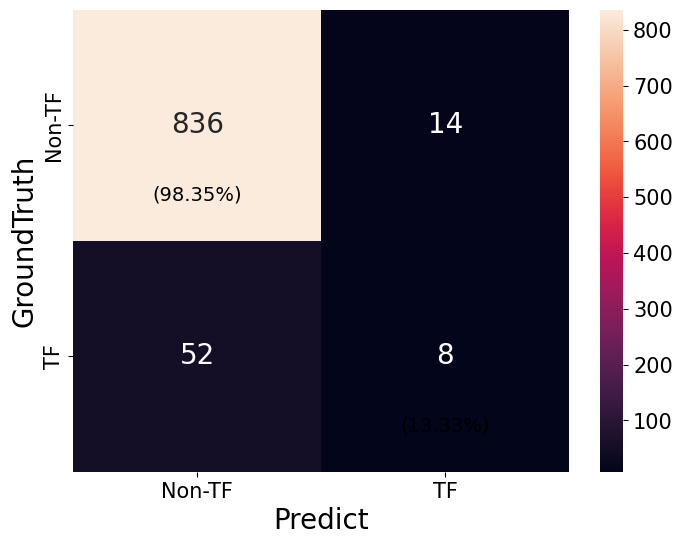

In [3]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
# 加载保存的数据
data = np.load('./label_gcn.npz')
pred = data['predict']
y_test = data['groundtruth']
target_names=['Non-TF','TF']
# 计算classification_report
report = classification_report(y_test, pred, target_names=target_names, output_dict = True)


import numpy as np

# 计算混淆矩阵
cm = confusion_matrix(y_test, pred)

# 计算每个类别的正确比例
correct_ratios = np.diag(cm) / cm.sum(axis=1)
pd.DataFrame(report).to_csv("1.csv")
# 绘制混淆矩阵热图
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names, annot_kws={"fontsize":20})
ax.set_xlabel('Predict', size=20)
ax.set_ylabel('GroundTruth', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gcf().set_size_inches(8, 6)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

# 在热图上标出每个类别的正确比例
for i, label in enumerate(target_names):
    ax.annotate(f"({correct_ratios[i]:.2%})", xy=(i+0.5, i+0.8), ha="center", va="center", fontsize=14, color="black")

plt.show()

In [4]:
pd.DataFrame(report).to_csv("1.csv")

In [5]:
pd.DataFrame(report)

,Non-TF,TF,accuracy,macro avg,weighted avg
precision,0.941441,0.363636,0.927473,0.652539,0.903344
recall,0.983529,0.133333,0.927473,0.558431,0.927473
f1-score,0.962025,0.195122,0.927473,0.578574,0.911460
support,850.000000,60.000000,0.927473,910.000000,910.000000
